In [1]:
#coding: utf-8
import numpy as np
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation
import os, sys
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
from sklearn.model_selection import train_test_split

/home/osaka/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [26]:
asumi_jpg = "mizumashi_asumi/"
iguchi_jpg = "mizumashi_iguchi/"
test = "test/"
def get_file(dir_path):
    filenames = os.listdir(dir_path)
    return filenames
 
pic = get_file(asumi_jpg)
y = []
y_test = []
for _ in range(len(pic)):
    y.append(1)
pic = get_file(iguchi_jpg)
for _ in range(len(pic)):
    y.append(0)
print(len(y))

pic = get_file(test)
for i in range(len(pic)):
    print(pic[i])
    pic[i] = pic[i].split("_")[1]
    pic[i] = pic[i].split(".")[0]
    if len(pic[i]) == 2:
        y_test.append(0)
    else:
        y_test.append(1)
print(y_test)
pic = get_file(test)

1065
out_52.jpg
out_118.jpg
out_116.jpg
out_115.jpg
out_112.jpg
out_120.jpg
out_48.jpg
out_66.jpg
out_119.jpg
out_54.jpg
out_55.jpg
out_46.jpg
out_51.jpg
out_56.jpg
out_60.jpg
out_103.jpg
out_98.jpg
out_50.jpg
out_106.jpg
out_63.jpg
out_67.jpg
out_100.jpg
out_47.jpg
out_107.jpg
out_114.jpg
out_104.jpg
out_59.jpg
out_64.jpg
out_108.jpg
out_111.jpg
out_68.jpg
out_102.jpg
out_58.jpg
out_99.jpg
out_110.jpg
out_62.jpg
[0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0]


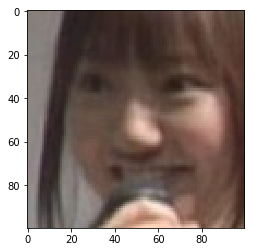

In [18]:
img = cv2.imread(asumi_jpg + pic[0])

plt.show(plt.imshow(np.asarray(Image.open(asumi_jpg + pic[0]))))

In [20]:
a = cv2.imread(iguchi_jpg + pic[2], 0)
cv2.imshow('image', a)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [21]:
asumi_jpg = "mizumashi_asumi/"
iguchi_jpg = "mizumashi_iguchi/"
test = "test/"
x = []
pic = get_file(asumi_jpg)
print(len(pic))
for i in range(len(pic)):
    x.append(cv2.imread(asumi_jpg + pic[i]).tolist())

pic = get_file(iguchi_jpg)
print(len(pic))
for i in range(len(pic)):
    x.append(cv2.imread(iguchi_jpg + pic[i]).tolist())
x = np.asarray(x)
x = x / 255

pic = get_file(test)
print(len(pic))
x_test = []
for j in range(len(pic)):
    x_test.append(cv2.imread(test + pic[j]).tolist())
x_test = np.asarray(x_test)
x_test = x_test / 255


510
555
36


In [36]:
model = Sequential()
model.add(Convolution2D(16, 3, 3, border_mode="same", input_shape=(100, 100, 3, ))) 
model.add(Activation("relu"))
    
#２層目の畳み込み層
model.add(Convolution2D(16, 3, 3, border_mode="same"))
model.add(Activation("relu"))
    
#プーリング層
model.add(MaxPooling2D())
    
#Dropoutとは過学習を防ぐためのもの　0.5は次のニューロンへのパスをランダムに半分にするという意味
model.add(Dropout(0.5))

#３層目の作成
model.add(Convolution2D(32, 3, 3, border_mode="same"))
model.add(Activation("relu"))
  
#４層目の作成
model.add(Convolution2D(32, 3, 3, border_mode="same"))
model.add(Activation("relu"))
    
#プーリング層
model.add(MaxPooling2D())
model.add(Dropout(0.5))
    
#５層目
model.add(Convolution2D(64, 3, 3, border_mode="same"))
model.add(Activation("relu"))
    
#6層目
model.add(Convolution2D(64, 3, 3, border_mode="same"))
model.add(Activation("relu"))
    
#プーリング層
model.add(MaxPooling2D())
    
#Dropout
model.add(Dropout(0.5))
    
#7層目
model.add(Convolution2D(128, 3, 3, border_mode="same"))
model.add(Activation("relu"))
    
#Dropout
model.add(Dropout(0.5))
    
#平坦化
model.add(Flatten())
    
#8層目　全結合層　FC
model.add(Dense(100))
model.add(Activation("relu"))
    
#Dropout
model.add(Dropout(0.3))
    
#8層目　引数nub_classesとは分類の数を定義する。
model.add(Dense(1))
model.add(Activation('sigmoid'))
    
#ここまででモデルの層完成
    
#lossは損失関数を定義するところ
model.compile(loss="binary_crossentropy", metrics = ["accuracy"], optimizer = "adam")

model.summary()

/home/osaka/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), input_shape=(100, 100,..., padding="same")`
  
/home/osaka/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), padding="same")`
  
/home/osaka/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), padding="same")`
  app.launch_new_instance()
/home/osaka/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), padding="same")`
/home/osaka/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:28: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 100, 100, 16)      448       
_________________________________________________________________
activation_37 (Activation)   (None, 100, 100, 16)      0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 100, 100, 16)      2320      
_________________________________________________________________
activation_38 (Activation)   (None, 100, 100, 16)      0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 50, 50, 16)        0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 50, 50, 32)        4640      
__________

In [29]:
epochs = 50
results = model.fit(x, y, epochs=epochs, batch_size=32, validation_split=0.1)

Train on 958 samples, validate on 107 samples
Epoch 1/50
958/958 [==============================] - 15s 16ms/step - loss: 0.6974 - acc: 0.5188 - val_loss: 0.7414 - val_acc: 0.0000e+00
Epoch 2/50
958/958 [==============================] - 16s 17ms/step - loss: 0.6911 - acc: 0.5324 - val_loss: 0.7188 - val_acc: 0.0000e+00
Epoch 3/50
958/958 [==============================] - 13s 14ms/step - loss: 0.6878 - acc: 0.5407 - val_loss: 0.7538 - val_acc: 0.0748
Epoch 4/50
958/958 [==============================] - 13s 13ms/step - loss: 0.6875 - acc: 0.5585 - val_loss: 0.7192 - val_acc: 0.0000e+00
Epoch 5/50
958/958 [==============================] - 13s 13ms/step - loss: 0.6522 - acc: 0.6503 - val_loss: 0.6996 - val_acc: 0.5047
Epoch 6/50
958/958 [==============================] - 12s 13ms/step - loss: 0.5384 - acc: 0.7234 - val_loss: 0.4815 - val_acc: 0.7850
Epoch 7/50
958/958 [==============================] - 13s 13ms/step - loss: 0.4687 - acc: 0.7829 - val_loss: 0.4586 - val_acc: 0.8318
Epoc

In [30]:
model.save("igumoko_0827.h5")
model.evaluate(x_test, y_test)

36/36 [==============================] - 0s 4ms/step


[1.1461907227834065, 0.8333333333333334]

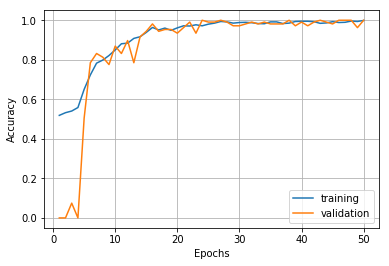

In [31]:
 
plt.plot(range(1, epochs+1), results.history['acc'], label="training")
plt.plot(range(1, epochs+1), results.history['val_acc'], label="validation")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.savefig("acc_fig2.png")
plt.show()


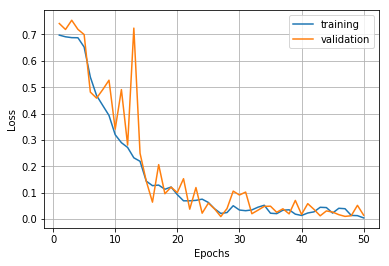

In [32]:
 
plt.plot(range(1, epochs+1), results.history['loss'], label="training")
plt.plot(range(1, epochs+1), results.history['val_loss'], label="validation")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.savefig("loss_fig2.png")
plt.show()


In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error

In [34]:
pred = model.predict(x_test)
pred = np.where(pred > 0.5, 1, 0)
#print(pred)
print(confusion_matrix(y_test, pred))
print(accuracy_score(y_test, pred))
print(mean_squared_error(y_test, pred))

[[16  4]
 [ 2 14]]
0.8333333333333334
0.16666666666666666


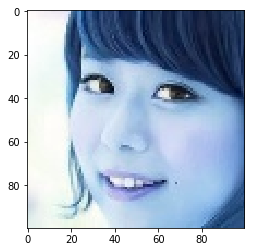

井口裕香さんです。


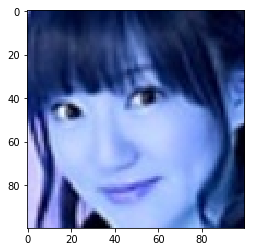

阿澄佳奈さんです。


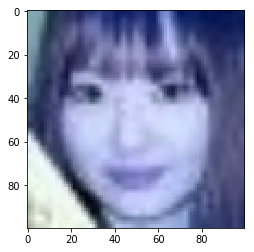

阿澄佳奈さんです。


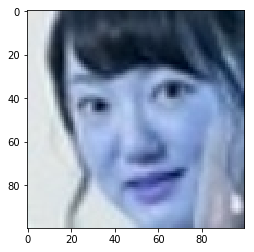

阿澄佳奈さんです。


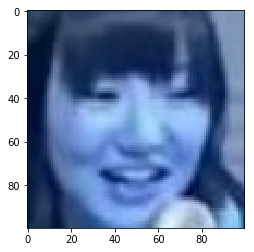

阿澄佳奈さんです。


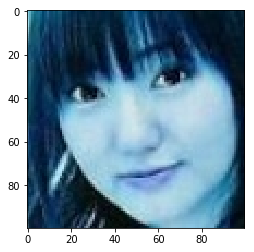

井口裕香さんです。


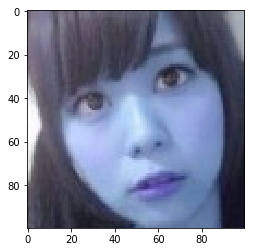

井口裕香さんです。


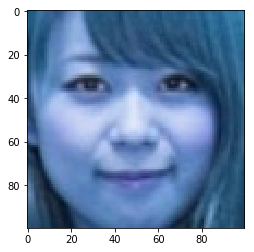

井口裕香さんです。


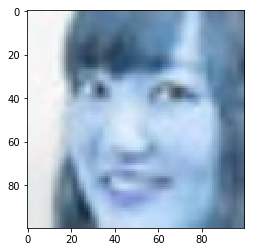

阿澄佳奈さんです。


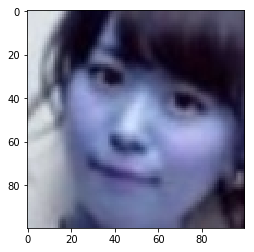

井口裕香さんです。


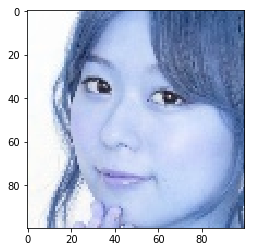

阿澄佳奈さんです。


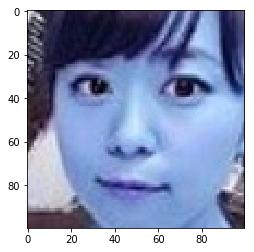

井口裕香さんです。


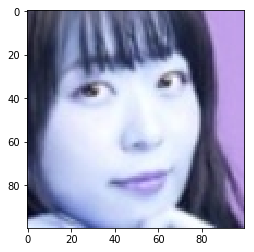

井口裕香さんです。


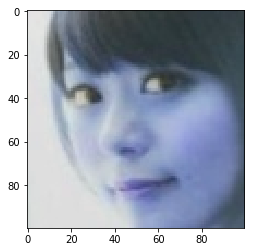

阿澄佳奈さんです。


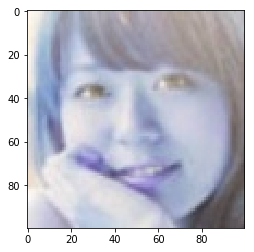

井口裕香さんです。


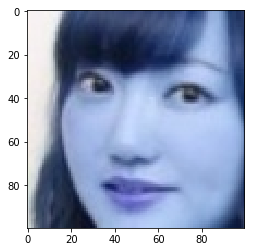

阿澄佳奈さんです。


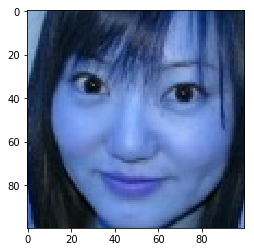

阿澄佳奈さんです。


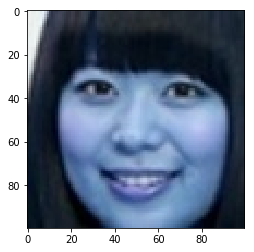

井口裕香さんです。


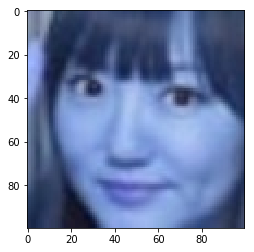

阿澄佳奈さんです。


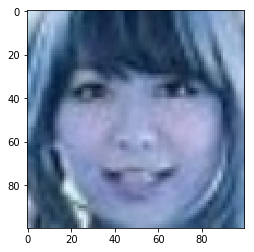

井口裕香さんです。


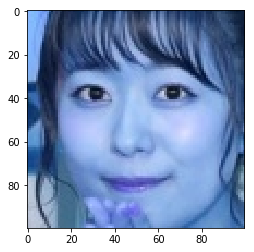

井口裕香さんです。


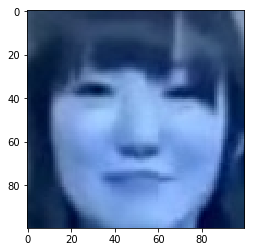

阿澄佳奈さんです。


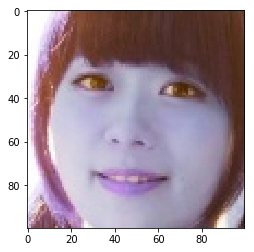

井口裕香さんです。


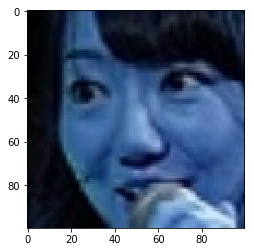

阿澄佳奈さんです。


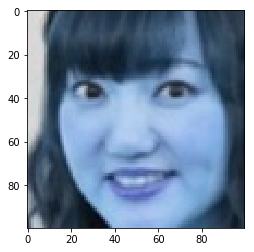

阿澄佳奈さんです。


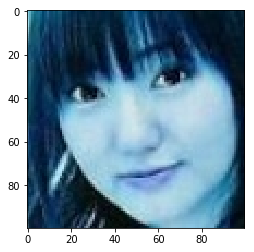

井口裕香さんです。


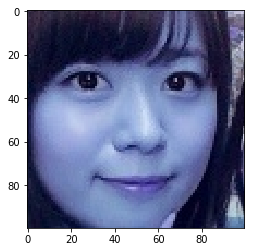

井口裕香さんです。


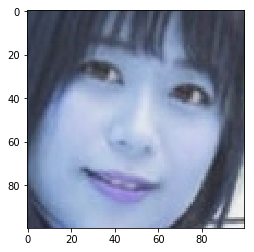

井口裕香さんです。


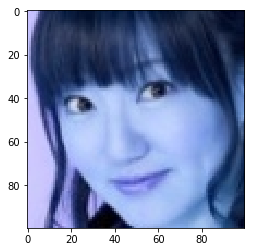

阿澄佳奈さんです。


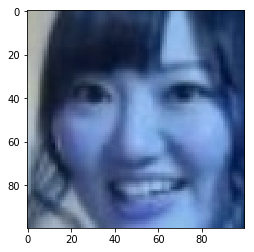

阿澄佳奈さんです。


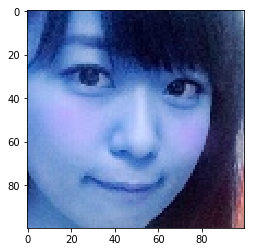

井口裕香さんです。


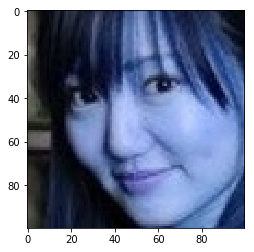

阿澄佳奈さんです。


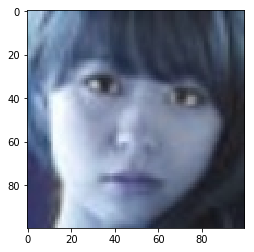

井口裕香さんです。


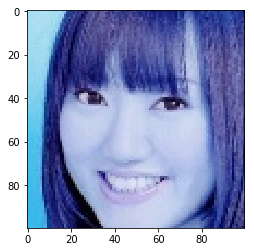

阿澄佳奈さんです。


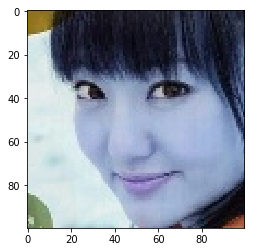

阿澄佳奈さんです。


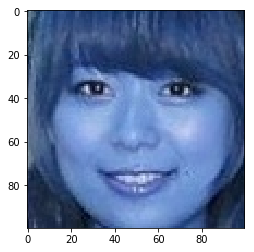

井口裕香さんです。


In [35]:
test = []
test = x_test
pred = model.predict(test)
for i in range(len(test)):
    x_test = x_test * 255
    plt.imshow(test[i])
    plt.show()
    if pred[i] > 0.5:
        print("阿澄佳奈さんです。")
    else:
        print("井口裕香さんです。")